In [12]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [13]:
# Make the dataset
N = 1000 
X = np.random.random((N, 2)) * 6 -3 # uniformly distributed b/w -3 & 3
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

This implements the function:
y = cos(2x1) + cos(3x2)

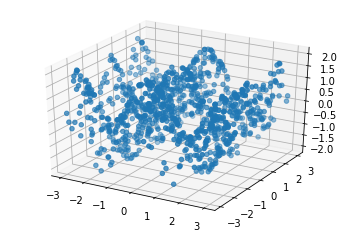

In [14]:
# Plot function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y);

In [15]:
# Build the model 
model = nn.Sequential(
    nn.Linear(2, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)

In [16]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [17]:
# Train the model
def full_gd(model, criterion, optimizer, X_train, y_train, epochs=1000):
  # Stuff to store
  train_losses = np.zeros(epochs)

  for it in range(epochs):
    # zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    loss.backward()
    optimizer.step()

    # Save losses
    train_losses[it] = loss.item()

    if (it + 1) % 50 == 0:
      print(f"Epoch {it+1}/{epochs}, Train Loss: {loss.item():.4f}")

  return train_losses

X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(Y.astype(np.float32).reshape(-1, 1))
train_losses = full_gd(model, criterion, optimizer, X_train, y_train)

Epoch 50/1000, Train Loss: 0.6631
Epoch 100/1000, Train Loss: 0.3388
Epoch 150/1000, Train Loss: 0.2415
Epoch 200/1000, Train Loss: 0.1177
Epoch 250/1000, Train Loss: 0.0413
Epoch 300/1000, Train Loss: 0.0187
Epoch 350/1000, Train Loss: 0.0096
Epoch 400/1000, Train Loss: 0.0054
Epoch 450/1000, Train Loss: 0.0063
Epoch 500/1000, Train Loss: 0.0040
Epoch 550/1000, Train Loss: 0.0041
Epoch 600/1000, Train Loss: 0.0054
Epoch 650/1000, Train Loss: 0.0034
Epoch 700/1000, Train Loss: 0.0052
Epoch 750/1000, Train Loss: 0.0031
Epoch 800/1000, Train Loss: 0.0030
Epoch 850/1000, Train Loss: 0.0029
Epoch 900/1000, Train Loss: 0.0029
Epoch 950/1000, Train Loss: 0.0030
Epoch 1000/1000, Train Loss: 0.0029


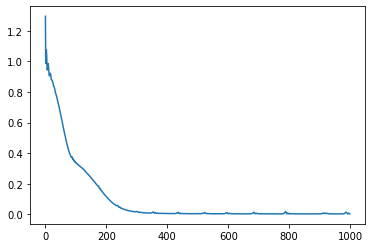

In [18]:
plt.plot(train_losses)

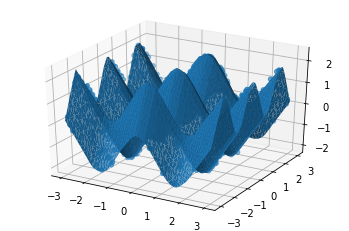

In [22]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# Surface plot
with torch.no_grad():
  line = np.linspace(-3, 3, 50) # 50 evenly spaced pts b/w -3 and 3
  xx, yy = np.meshgrid(line, line) # Performs cross product b/w the 2 pts x1 and x2 (xx first axis and yy 2nd axis)
  Xgrid = np.vstack((xx.flatten(), yy.flatten())).T # Flatten the xx and yy arrays and stacks them vertically and transpose to make it 2 by N array
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32)) # Use model to make predictions on Xgrid
  Yhat = model(Xgrid_torch).numpy().flatten() # Flatten the results found by the model since it is N by 1 array
  ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True) # plots 3d plot
  plt.show()

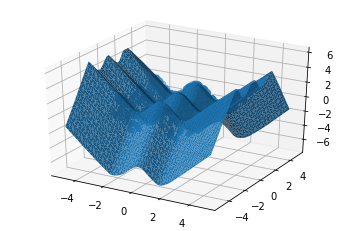

In [24]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:,1], Y)

# surface plot 
with torch.no_grad():
  line = np.linspace(-5, 5, 50)
  xx, yy = np.meshgrid(line, line)
  Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
  plt.show()